In [27]:

from utility import *
from sampling import *
from pool import *

def runMe(sequence_length,num_rounds=3,affinity_max=1e6):
    """
    Simulate a basic binding experiment.  
    """
    
    scalar = 20**(sequence_length)
    library_size = scalar*2.8e-5
    
    print(scalar, library_size, 9.77e-10*scalar)
    
    pipet = PipetteSampler()
    screen = BindingSampler(conc_constant=1.5e18)
    amplify = PhageAmplificationSampler()

    pool = Pool(sequence_length=sequence_length,alphabet=AMINO_ACIDS)
    pool.createUniformPool(library_size,affinity_max)

    try:
        print(0,pool.current_counts.size,sum(pool.current_counts))
        for i in range(num_rounds):
            pipet.runExperiment(pool,library_size)  #7e5) #100*scalar)
            screen.runExperiment(pool,1.5e-3*scalar) #4e7) #1*scalar)
            amplify.runExperiment(pool,6.8e-3*scalar,checkpoint=True) #1.75e8) #100*scalar,checkpoint=True)

            print(i+1,pool.current_counts.size,sum(pool.current_counts))
    
    except PoolIsEmptyError:
        pass
    
    
    return pool






In [33]:
pool = runMe(3,num_rounds=3,affinity_max=1e6)

import pickle
f = open("yo.pickle","wb")
pickle.dump(pool,f)
f.close()

8000 0.224 7.816000000000001e-06
0 0 0


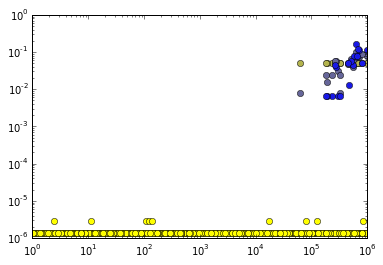

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

pool.round_affinities(0)

m = len(pool.checkpoints)
for i, x in enumerate(pool.checkpoints):
    if x == True:
        plt.plot(pool.round_affinities(i),pool.round_counts(i)/np.sum(pool.round_counts(i)),"o",color=[1-i/m,1-i/m,i/m])


unique_contents = []
for i, x in enumerate(pool.checkpoints):
    if x == True:
        unique_contents.extend(pool.round_contents(i))
        
counter = 0
out_dict = dict([(k,[0,0,0,0,0]) for k in unique_contents])
for i, x in enumerate(pool.checkpoints):
    if x == True:        
        counts = pool.round_counts(i)
        affinities = pool.round_affinities(i)
        
        for j, x in enumerate(pool.round_contents(i)):            
            out_dict[x][counter] = counts[j]
            out_dict[x][4] = affinities[j]
        
        counter = counter + 1
    
final_dict = {}
for k in out_dict.keys():
    if out_dict[k][1] != 0:
        final_dict[k] = out_dict[k][:]

plt.xscale('log')
plt.yscale('log')
plt.show()
    

In [8]:
out = []
for k in final_dict.keys():
    x = final_dict[k]
    out.append((final_dict[k][4],final_dict[k]))

In [9]:
out.sort()

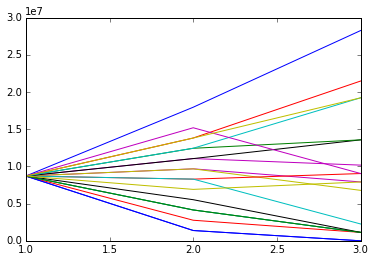

In [21]:
for a in out:
    plt.plot([1,2,3],a[1][1:4])
    #plt.plot([1,2,3],a[1][1:4],"o")
    
plt.show()